# Morphological Transformations
- https://docs.opencv.org/4.1.2/d9/d61/tutorial_py_morphological_ops.html
- http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

Read a color image in BGR.

In [3]:
im = cv.imread('nature-500x375.jpg')
im.shape

(375, 500, 3)

In [4]:
# need to change to RGB from BGR
def cvimshow (im, g=False):
    plt.figure(figsize=(10,10))
    plt.imshow(im[:,:,::-1])
    
def gimshow (im):
    plt.figure(figsize=(10,10))
    plt.imshow (im, cmap='gray')

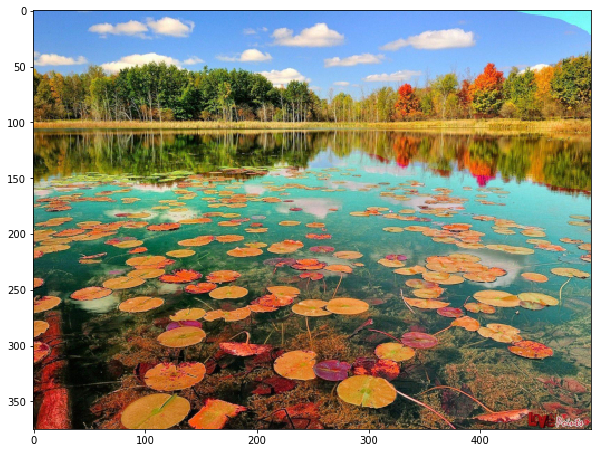

In [5]:
cvimshow (im)

## A structuring element.
We need it to apply a Morphological filtering.

In [6]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5,5))
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

## Dilation
Dilation is the operation choosing the maximum in the kernel area, for each channel.

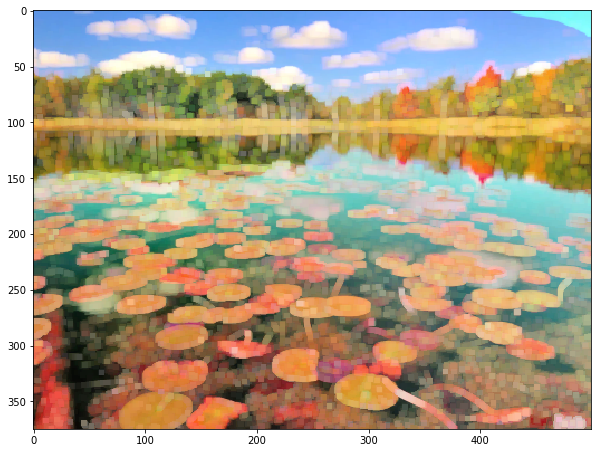

In [7]:
imdi = cv.dilate (im, kernel)
cvimshow (imdi)

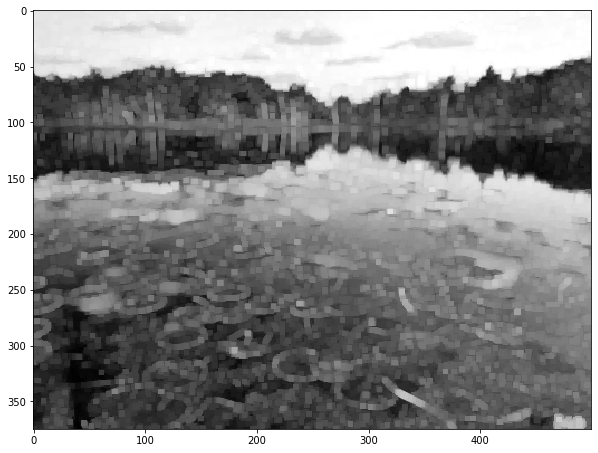

In [8]:
gimshow(imdi[:,:,0])

Let's do it in a for-loop.
- No boundary operation will be applied.

In [9]:
gim = im[:,:,0]        

In [10]:
def myDilate(src, ker):
    res = np.zeros_like(src)
    for i in range(src.shape[0]-ker.shape[0]-1):
        for j in range(src.shape[1]-ker.shape[1]-1):
            roi = src[i:i+ker.shape[0], j:j+ker.shape[1]]
            masked = roi[ker==1]
            maxval = masked.max()
            #print (masked, maxval)
            res[i,j] = maxval
#            break
#        break
    return res

In [11]:
mdres = myDilate(gim, kernel)

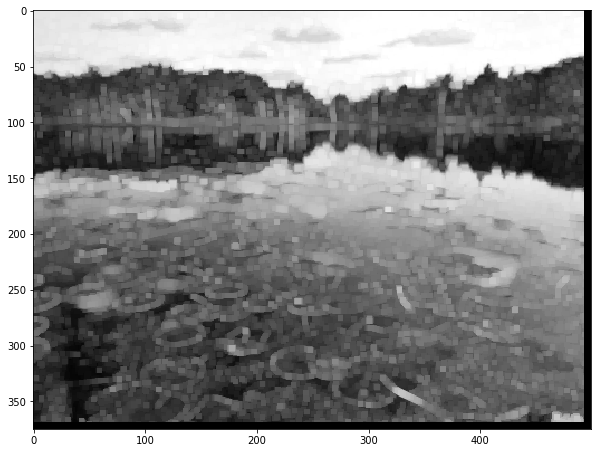

In [12]:
gimshow(mdres)

## Eroson
Minimun Selection Filter

In [13]:
im_er = cv.erode(im, kernel)

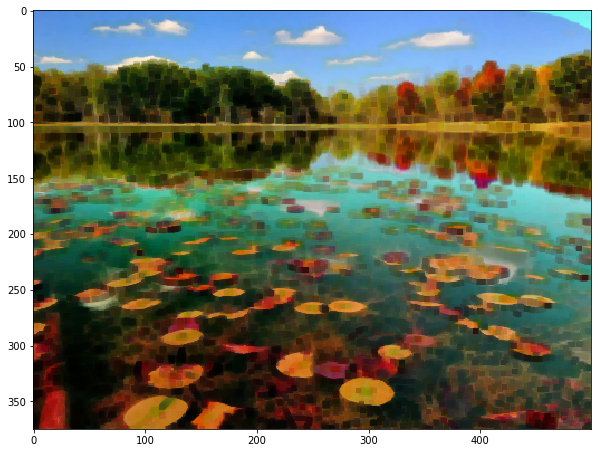

In [14]:
cvimshow (im_er)

## Closing
Two operations 
1. Dilation
2. Erosion

In [15]:
im_clo = cv.morphologyEx (im, cv.MORPH_CLOSE, kernel)

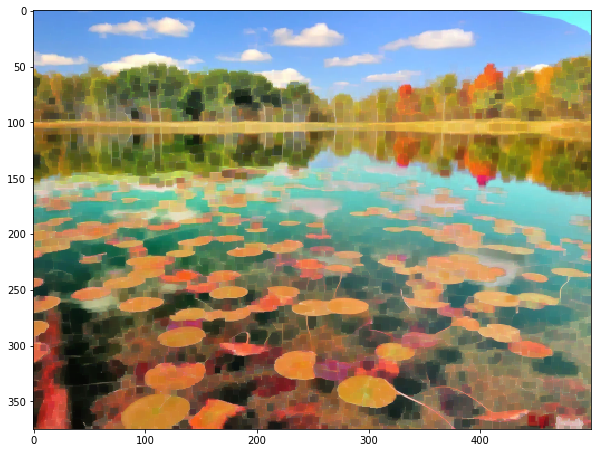

In [16]:
cvimshow (im_clo)

### Closing with another kernel

(-0.5, 12.5, 12.5, -0.5)

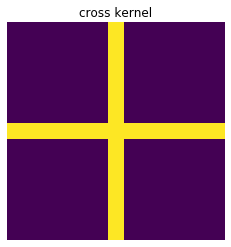

In [17]:
kernel2 = cv.getStructuringElement(cv.MORPH_CROSS, (13,13))
plt.imshow(kernel2)
plt.title('cross kernel')
plt.axis(False)

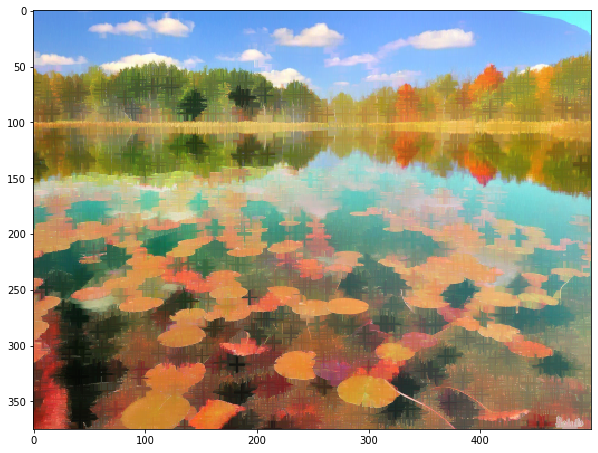

In [18]:
im_clo2 = cv.morphologyEx (im, cv.MORPH_CLOSE, kernel2)
cvimshow (im_clo2)

## Opening
1. Eroson
2. Dilation

In [19]:
im_op = cv.morphologyEx(im, cv.MORPH_OPEN, kernel)

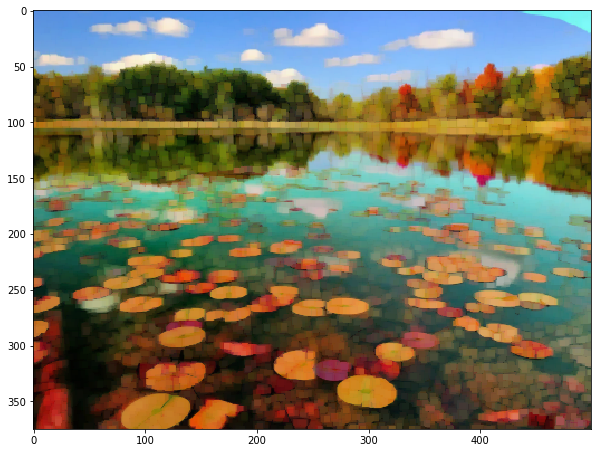

In [20]:
cvimshow (im_op)

## Morphological Gradient
Result = Dilation - Eroson
- always positive

In [21]:
im_gr = cv.morphologyEx(im, cv.MORPH_GRADIENT, kernel)

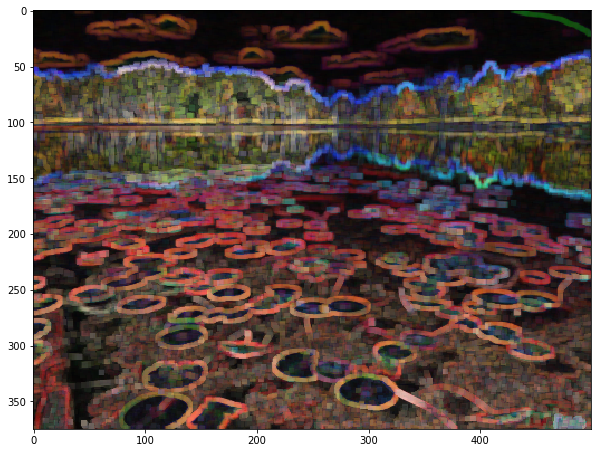

In [22]:
cvimshow (im_gr)

## Top Hat
Result = Input - Opening
- always positive

In [23]:
im_tophat = cv.morphologyEx(im, cv.MORPH_TOPHAT, kernel)

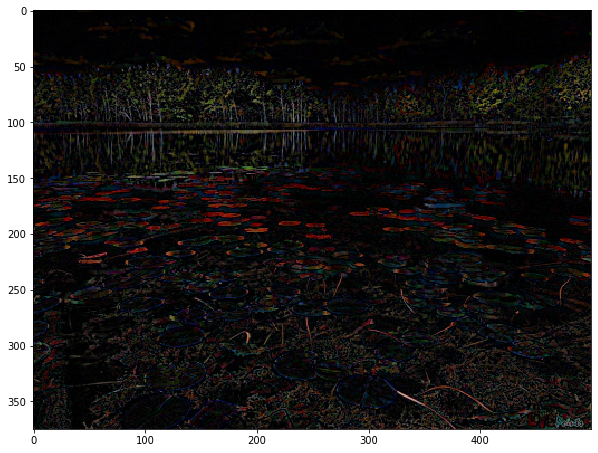

In [24]:
cvimshow (im_tophat)

## Black hat
Result = Closing - Input
- always positive

In [25]:
im_blackhat = cv.morphologyEx(im, cv.MORPH_BLACKHAT, kernel)

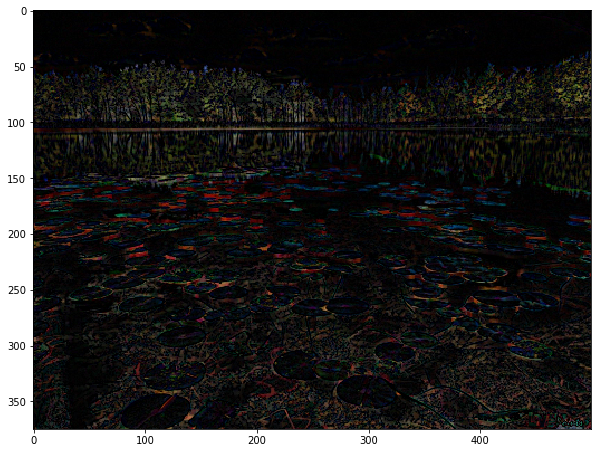

In [26]:
cvimshow (im_blackhat)

## Morphological Operations for Binary Images

In [27]:
im = cv.imread ('img536.jpg')
im = cv.cvtColor (im, cv.COLOR_BGR2GRAY)

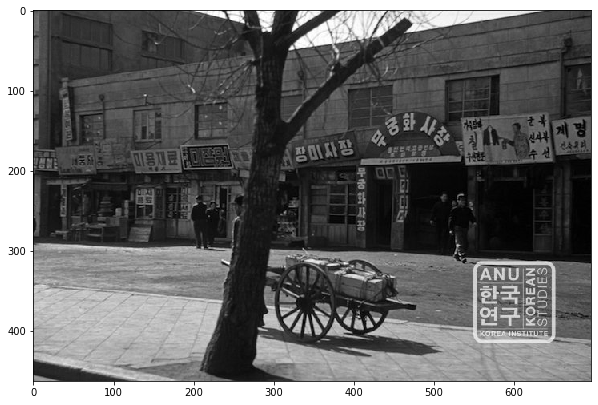

In [28]:
gimshow (im)

### Thresholding to get a binary image

In [29]:
th, im_bin= cv.threshold(im, thresh=100, maxval=255, type=cv.THRESH_BINARY + cv.THRESH_OTSU)
th

108.0

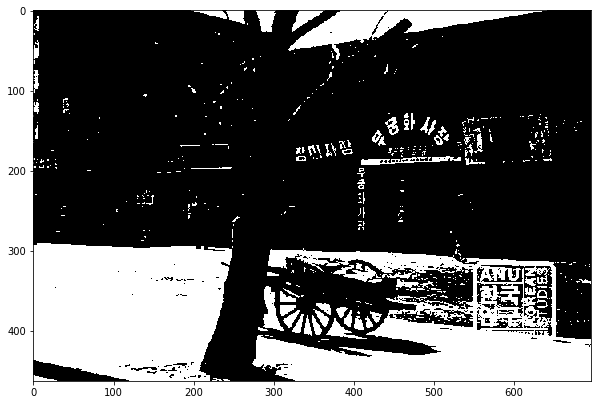

In [30]:
gimshow(im_bin)

## Dilation of Binary Image

In [31]:
im_dil = cv.morphologyEx(im_bin, cv.MORPH_DILATE, kernel)

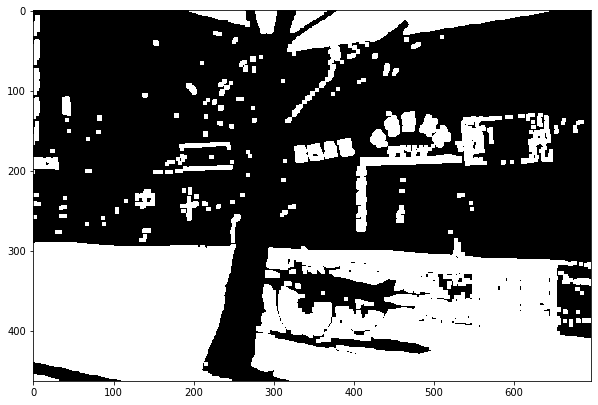

In [32]:
gimshow (im_dil)

## Closing of Binary Image
1. Dilation
2. Erosion

- compare to Dilation

In [33]:
im_close = cv.morphologyEx(im_bin, cv.MORPH_CLOSE, kernel)

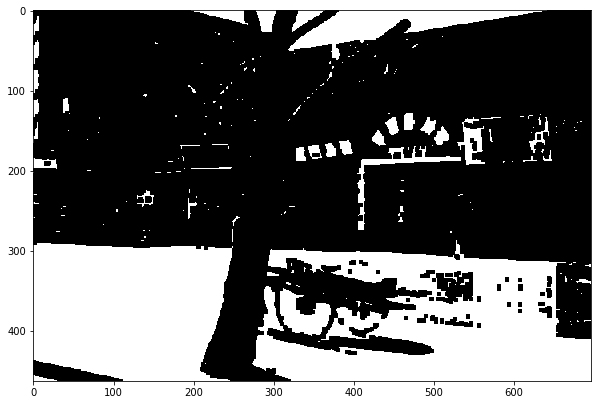

In [34]:
gimshow (im_close)

## Erosion of Binary Image
- compare to Opening

In [35]:
im_erode = cv.morphologyEx(im_bin, cv.MORPH_ERODE, kernel)

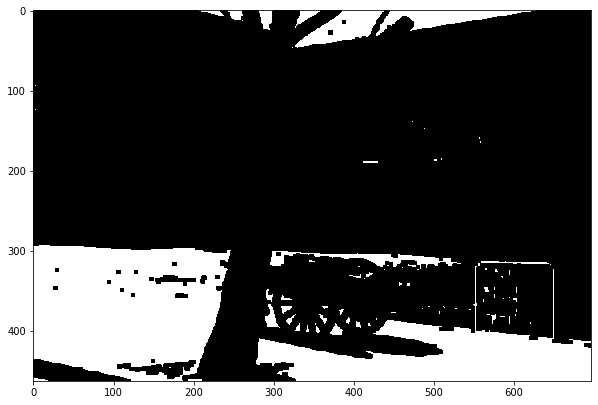

In [36]:
gimshow(im_erode)

## Opening of Binary Image
- compare to Erosion

In [37]:
im_open = cv.morphologyEx (im_bin, cv.MORPH_OPEN, kernel)

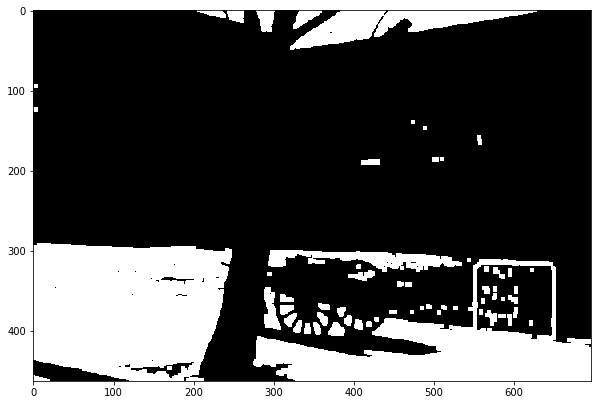

In [38]:
gimshow (im_open)

## Morphological Gradient for Binary Image
Res = Dilation - Erosion

In [39]:
im_grad = cv.morphologyEx (im_bin, cv.MORPH_GRADIENT, kernel)

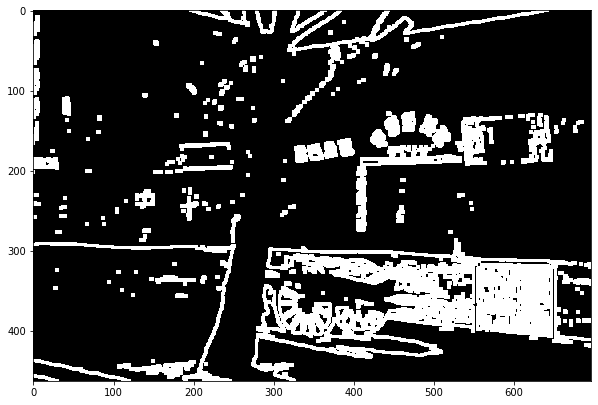

In [40]:
gimshow(im_grad)

## Top Hat
Res = Image - Opening

In [41]:
res = cv.morphologyEx(im_bin, cv.MORPH_TOPHAT, kernel)

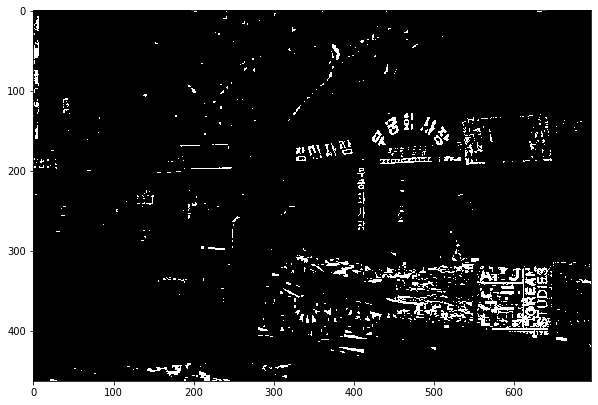

In [42]:
gimshow(res)

## Black Hat
Res = Closing - Input

In [43]:
res = cv.morphologyEx(im_bin, cv.MORPH_BLACKHAT, kernel)

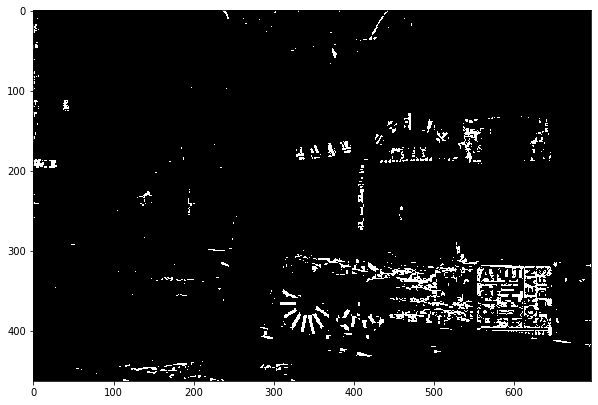

In [44]:
gimshow (res)

## Q. Examine the effects of various shpaes and sizes of kernels.